In [68]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

Об'єднуємо всі дані в один фрейм

In [69]:
joined_files_paths = os.path.join(r'E:\Unik\dds_ch2_nyt', "nyt*.csv")
joined_files_paths_list = glob.glob(joined_files_paths)
user_data = pd.concat(map(pd.read_csv,joined_files_paths_list),ignore_index=True)
user_data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
14905860,0,0,6,0,0
14905861,0,0,1,0,0
14905862,63,1,0,0,1
14905863,50,0,16,0,1


Розділяємо користувачів на вікові підгрупи 

In [70]:
user_ages = [user_data['Age'].min(), 18, 25, 35, 45, 55, 65,user_data['Age'].max()]
ages = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
user_data['age_group'] = pd.cut(user_data['Age'], bins=user_ages, labels=ages)
user_data

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
14905860,0,0,6,0,0,NaN
14905861,0,0,1,0,0,NaN
14905862,63,1,0,0,1,55-64
14905863,50,0,16,0,1,45-54


Відфільтруємо дані від невизначених груп

In [71]:
filtered_data = user_data.dropna(subset=['age_group'])
filtered_data

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
14905857,60,1,2,0,1,55-64
14905858,47,0,4,0,1,45-54
14905862,63,1,0,0,1,55-64
14905863,50,0,16,0,1,45-54


Додаємо колонку зі значенням CTR (clicks до impressions) і обчислюємо кількість показів та середнє значення показника CTR при кількості показів для кожної вікової групи

In [72]:
filtered_data['CTR'] = filtered_data['Clicks'] / filtered_data['Impressions']
age_group_data = filtered_data.groupby('age_group').agg({'Impressions': 'sum', 'CTR': 'mean'}).reset_index();
age_group_data

C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\2856972485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CTR'] = filtered_data['Clicks'] / filtered_data['Impressions']
C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\2856972485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = filtered_data.groupby('age_group').agg({'Impressions': 'sum', 'CTR': 'mean'}).reset_index();


,age_group,Impressions,CTR
0,<18,2788471,0.026531
1,18-24,5575517,0.009990
2,25-34,8463718,0.010045
3,35-44,10167134,0.010007
4,45-54,9137803,0.010442
5,55-64,6299567,0.020335
6,65+,4015196,0.030008


Описуємо графік коефіцієнту кліків відповідно до кожної з вікових груп

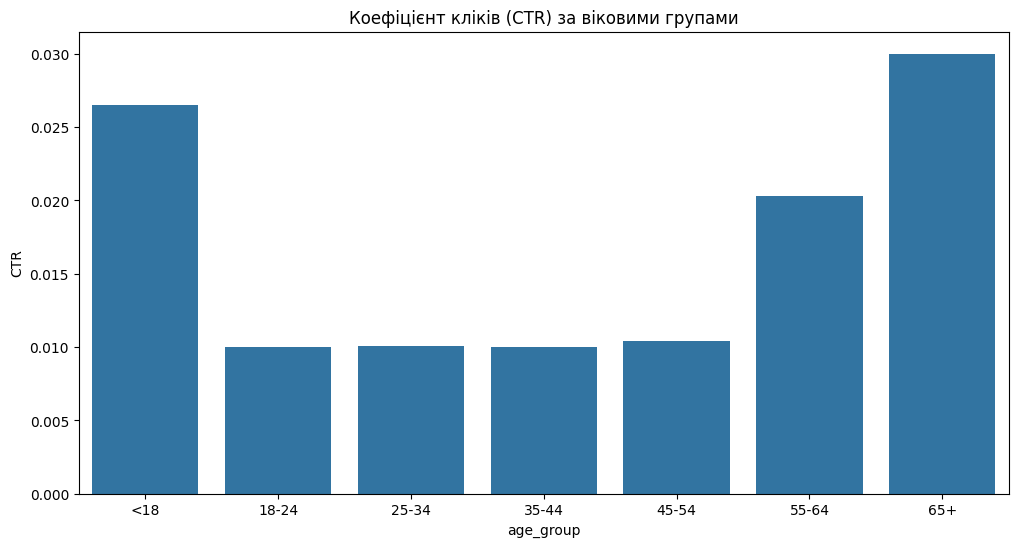

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='CTR', data=age_group_data)
plt.title('Коефіцієнт кліків (CTR) за віковими групами')
plt.show()

Можемо побачити, що найбільший коефіцієнт кліків в групах 65+, <18 та 55-64. Оголошення для людей віком 18-54 спрацьовують набагато менше.

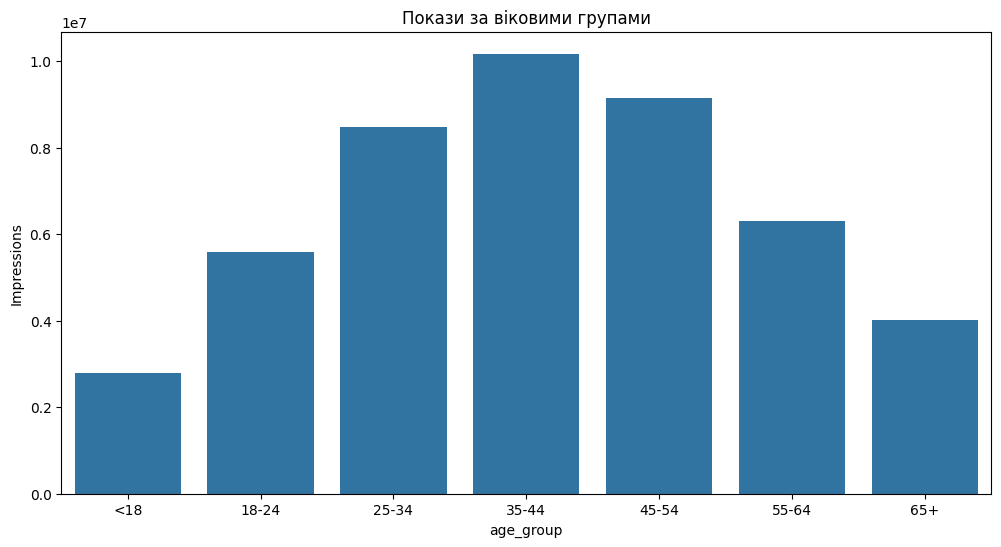

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='Impressions', data=age_group_data)
plt.title('Покази за віковими групами')
plt.show()

Бачимо, що найбільна кількість показів для вікових груп 25-54. Оскільки для цих груп також є низьким коефіцієнт CTR, можна зробити висновок, що оголошення для них є нецікавими, проте можна свідчити про те що оголошення є ефективними для людей вікових груп <18 та 65+, оскільки при меншій кількості показів коефіцієнт CTR є вищим.

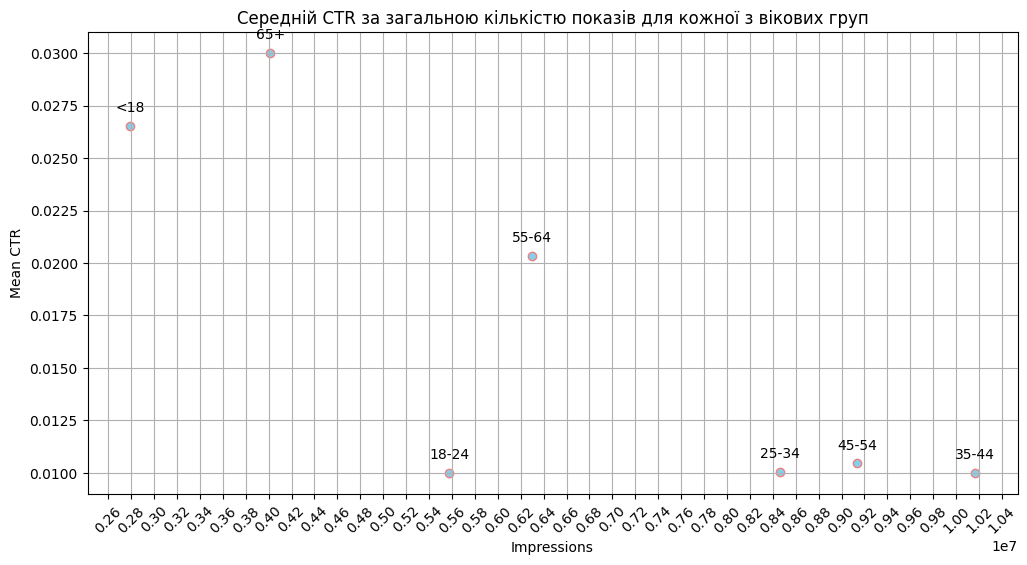

In [75]:
plt.figure(figsize=(12, 6))
plt.scatter(age_group_data['Impressions'], age_group_data['CTR'], c='skyblue', marker='o', edgecolors='lightcoral')
plt.title('Середній CTR за загальною кількістю показів для кожної з вікових груп')
plt.ylabel('Mean CTR')
plt.xlabel('Impressions')
for i, age_group in enumerate(age_group_data['age_group']):
  plt.annotate(age_group, (age_group_data['Impressions'][i], age_group_data['CTR'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.locator_params(axis='x', nbins=50)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Порівнюємо покази для чоловіків і жінок старше 18 років

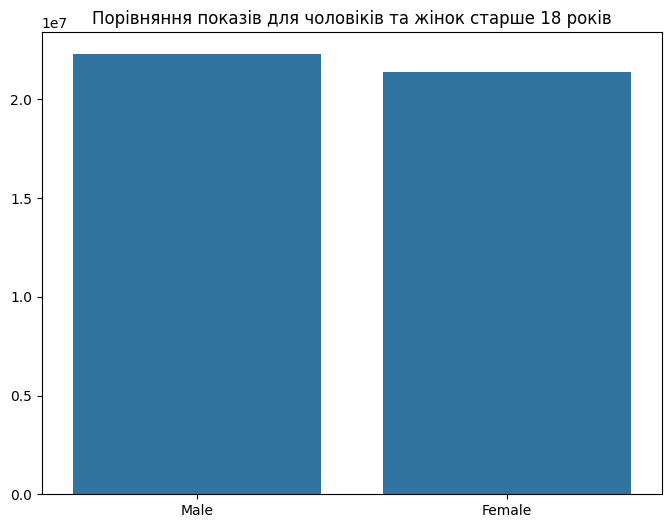

In [90]:
men_older_than_18 = filtered_data[(filtered_data['Gender']==1) & (filtered_data['Age']>18)]
women_older_than_18 = filtered_data[(filtered_data['Gender'] == 0) & (filtered_data['Age'] > 18)]
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[men_older_than_18['Impressions'].sum(), women_older_than_18['Impressions'].sum()])
plt.title('Порівняння показів для чоловіків та жінок старше 18 років')
plt.show()

Порівняємо кількість кліків для чоловіків і жінок віком старше 18 років

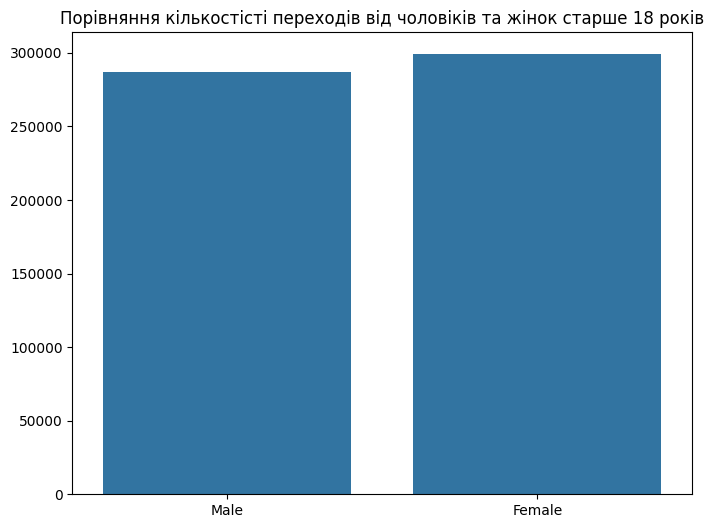

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[men_older_than_18['Clicks'].sum(), women_older_than_18['Clicks'].sum()])
plt.title('Порівняння кількостісті переходів від чоловіків та жінок старше 18 років')
plt.show()

Можемо побачити що незважаючи на меншу кількість показув, жінки частіше клікають на оголошення, ніж чоголовіки. Порівняємо CTR для чоловіків та жінок старше 18 років. 

C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\296996889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_older_than_18['CTR'] = men_older_than_18['Clicks'] / men_older_than_18['Impressions']
C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\296996889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_older_than_18['CTR'] = women_older_than_18['Clicks'] / women_older_than_18['Impressions']


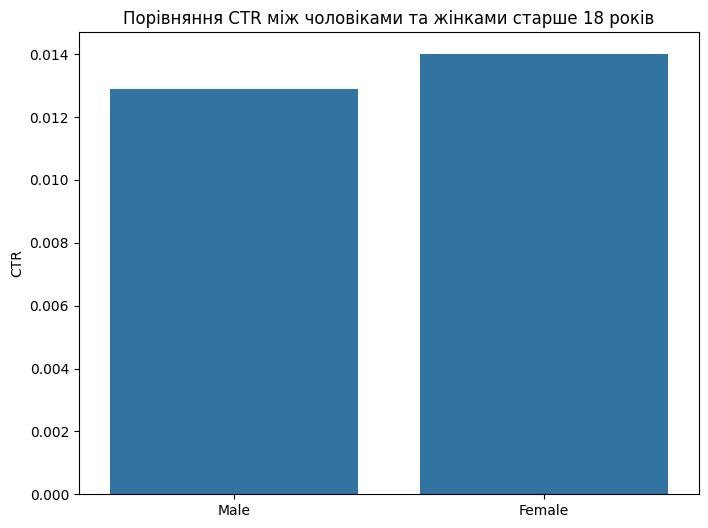

In [93]:
men_older_than_18['CTR'] = men_older_than_18['Clicks'] / men_older_than_18['Impressions']
women_older_than_18['CTR'] = women_older_than_18['Clicks'] / women_older_than_18['Impressions']
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[men_older_than_18['CTR'].mean(),women_older_than_18['CTR'].mean()])
plt.title('Порівняння CTR між чоловіками та жінками старше 18 років')
plt.ylabel('CTR')
plt.show()

Можемо побачити що коефіцієнт CTR серед людей старше 18 років для жінок вищий, ніж для чоловіків. Порівняємо кількість кліків серед авторизованих та неавторизованих користувачів.

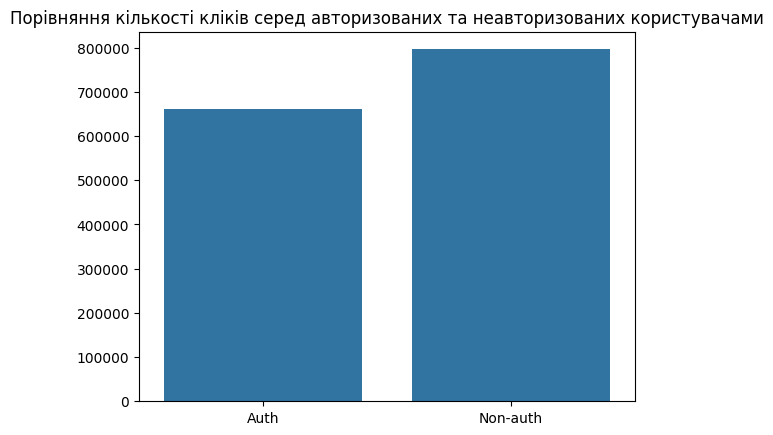

In [95]:
auth = user_data[user_data['Signed_In'] == 1]
non_auth = user_data[user_data['Signed_In'] == 0]
sns.barplot(x=['Auth', 'Non-auth'], y=[auth['Clicks'].sum(), non_auth['Clicks'].sum()])
plt.title('Порівняння кількості кліків серед авторизованих та неавторизованих користувачами')
plt.show()

Порівняємо кількість показів серед авторизованих та неавторизованих користувачів.

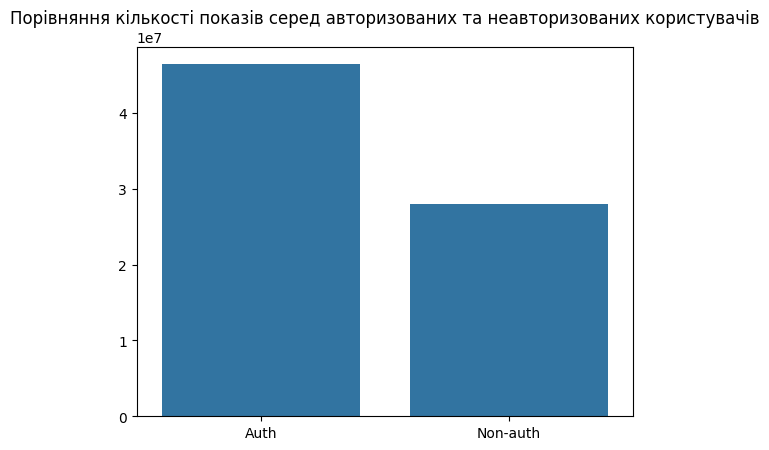

In [97]:
sns.barplot(x=['Auth', 'Non-auth'], y=[auth['Impressions'].sum(), non_auth['Impressions'].sum()])
plt.title('Порівняння кількості показів серед авторизованих та неавторизованих користувачів')
plt.show()

Можемо побачити, що кількість показів серед неавторизованих користувачів значно менша ніж для авторизованих, але авторизовані користувачі клікають на оголошення менше, тобто можна зробити висновок, що коефіцієнт CTR для неавторизованих користувачів є вищим:

C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\2223636395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auth['CTR'] = auth['Clicks'] / auth['Impressions']
C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\2223636395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_auth['CTR'] = non_auth['Clicks'] / non_auth['Impressions']


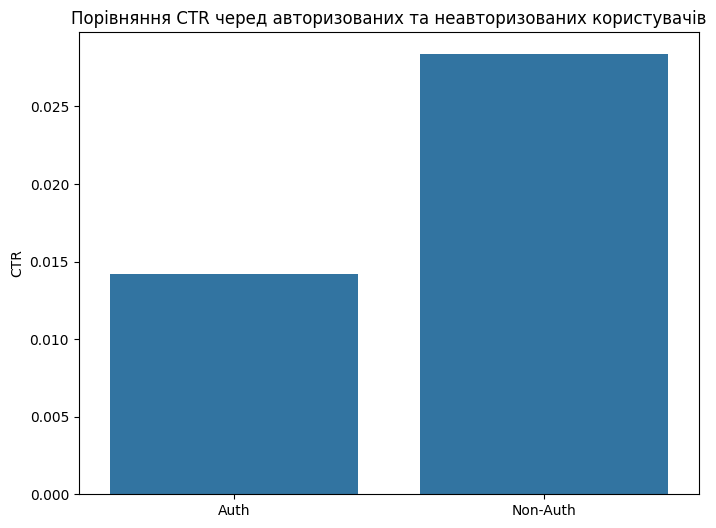

In [98]:
auth['CTR'] = auth['Clicks'] / auth['Impressions']
non_auth['CTR'] = non_auth['Clicks'] / non_auth['Impressions']
plt.figure(figsize=(8, 6))
sns.barplot(x=['Auth', 'Non-Auth'], y=[auth['CTR'].mean(), non_auth['CTR'].mean()])
plt.title('Порівняння CTR черед авторизованих та неавторизованих користувачів')
plt.ylabel('CTR')
plt.show()

Можемо побачити, що коефіцієнт CTR серед неавторизованих користувачів вдвічі більший.

Знайдемо квантилі, середнє значення, медіану, дисперсію та максимальне значення показів, кліків та CTR за віковими групами, за гендером та за статусом авторизації користувача

Для вікових груп:

In [83]:
age_group_quantiles = filtered_data.groupby('age_group').agg(Impressions_0_25=('Impressions', lambda x: x.quantile(0.25)),
    Impressions_0_5=('Impressions', lambda x: x.quantile(0.5)),
    Impressions_0_75=('Impressions', lambda x: x.quantile(0.75)),
    CTR_0_25=('CTR', lambda x: x.quantile(0.25)),
    CTR_0_5=('CTR', lambda x: x.quantile(0.5)),
    CTR_0_75=('CTR', lambda x: x.quantile(0.75)),
    Clicks_0_25=('Clicks', lambda x: x.quantile(0.25)),
    Clicks_0_5=('Clicks', lambda x: x.quantile(0.5)),
    Clicks_0_75=('Clicks', lambda x: x.quantile(0.75)))
age_group_mean = filtered_data.groupby('age_group').agg(Mean_Impressions=('Impressions','mean'),Mean_CTR=('CTR','mean'),Mean_Clicks=('Clicks','mean'))
age_group_max = filtered_data.groupby('age_group').agg(Max_Impressions=('Impressions','max'),Max_CTR=('CTR','max'),Max_Clicks=('Clicks','max'))
age_group_median = filtered_data.groupby('age_group').agg(Median_Impressions=('Impressions','median'),Median_CTR=('CTR','median'),Median_Clicks=('Clicks','median'))
age_group_variance = filtered_data.groupby('age_group').agg(Variance_Impressions=('Impressions','var'),Variance_CTR=('CTR','var'),Variance_Clicks=('Clicks','var'))
age_group_df = pd.concat([age_group_quantiles,age_group_mean,age_group_variance,age_group_median,age_group_max],axis=1)
age_group_mean


C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\483594199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_quantiles = filtered_data.groupby('age_group').agg(Impressions_0_25=('Impressions', lambda x: x.quantile(0.25)),
C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\483594199.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mean = filtered_data.groupby('age_group').agg(Mean_Impressions=('Impressions','mean'),Mean_CTR=('CTR','mean'),Mean_Clicks=('Clicks','mean'))
C:\Users\ivank\AppData\Local\Temp\ipykernel_14356\483594199.py:11: FutureWarning: The default of observed=False is de

,Mean_Impressions,Mean_CTR,Mean_Clicks
age_group,,,
<18,5.006339,0.026531,0.133168
18-24,4.999208,0.009990,0.049990
25-34,4.996663,0.010045,0.050101
35-44,4.997689,0.010007,0.050035
45-54,4.997300,0.010442,0.052157
55-64,4.997511,0.020335,0.101410
65+,5.002381,0.030008,0.150174


In [84]:
age_group_df

,Impressions_0_25,Impressions_0_5,Impressions_0_75,CTR_0_25,CTR_0_5,CTR_0_75,Clicks_0_25,Clicks_0_5,Clicks_0_75,Mean_Impressions,...,Mean_Clicks,Variance_Impressions,Variance_CTR,Variance_Clicks,Median_Impressions,Median_CTR,Median_Clicks,Max_Impressions,Max_CTR,Max_Clicks
age_group,,,,,,,,,,,,,,,,,,,,,
<18,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.006339,...,0.133168,5.019357,0.006639,0.134620,5.0,0.0,0.0,19,1.0,4
18-24,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.999208,...,0.049990,5.003437,0.002563,0.050120,5.0,0.0,0.0,20,1.0,4
25-34,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.996663,...,0.050101,4.997274,0.002562,0.050079,5.0,0.0,0.0,19,1.0,3
35-44,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.997689,...,0.050035,4.991887,0.002547,0.049971,5.0,0.0,0.0,20,1.0,4
45-54,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.997300,...,0.052157,4.992517,0.002673,0.052357,5.0,0.0,0.0,20,1.0,4
55-64,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.997511,...,0.101410,4.995185,0.005163,0.101456,5.0,0.0,0.0,20,1.0,4
65+,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.002381,...,0.150174,4.983012,0.007460,0.149828,5.0,0.0,0.0,19,1.0,4


Можемо побачити, що квантилі та медіани співпадають у всіх вікових групах, максмальні значення майже однакові, дисперсія є невеликою.

Для гендерів:

In [85]:
user_data['CTR']=user_data['Clicks']/user_data['Impressions'];
gender_quantiles = user_data.groupby('Gender').agg(Impressions_0_25=('Impressions', lambda x: x.quantile(0.25)),
  Impressions_0_5=('Impressions', lambda x: x.quantile(0.5)),
  Impressions_0_75=('Impressions', lambda x: x.quantile(0.75)),
  CTR_0_25=('CTR', lambda x: x.quantile(0.25)),
  CTR_0_5=('CTR', lambda x: x.quantile(0.5)),
  CTR_0_75=('CTR', lambda x: x.quantile(0.75)),
  Clicks_0_25=('Clicks', lambda x: x.quantile(0.25)),
  Clicks_0_5=('Clicks', lambda x: x.quantile(0.5)),
  Clicks_0_75=('Clicks', lambda x: x.quantile(0.75)))
gender_mean = user_data.groupby('Gender').agg(Mean_Impressions=('Impressions','mean'), Mean_CTR=('CTR','mean'), Mean_Clicks=('Clicks','mean'))
gender_max = user_data.groupby('Gender').agg(Max_Impressions=('Impressions','max'), Max_CTR=('CTR','max'), Max_Clicks=('Clicks','max'))
gender_median = user_data.groupby('Gender').agg(Median_Impressions=('Impressions','median'), Median_CTR=('CTR','median'), Median_Clicks=('Clicks','median'))
gender_variance = user_data.groupby('Gender').agg(Variance_Impressions=('Impressions','var'), Variance_CTR=('CTR','var'), Variance_Clicks=('Clicks','var'))
gender_df = pd.concat([gender_quantiles,gender_mean,gender_variance,gender_max,gender_median],axis=1)
gender_mean

,Mean_Impressions,Mean_CTR,Mean_Clicks
Gender,,,
0,5.000612,0.022222,0.111123
1,4.997210,0.013936,0.069672


In [86]:
gender_df

,Impressions_0_25,Impressions_0_5,Impressions_0_75,CTR_0_25,CTR_0_5,CTR_0_75,Clicks_0_25,Clicks_0_5,Clicks_0_75,Mean_Impressions,...,Mean_Clicks,Variance_Impressions,Variance_CTR,Variance_Clicks,Max_Impressions,Max_CTR,Max_Clicks,Median_Impressions,Median_CTR,Median_Clicks
Gender,,,,,,,,,,,,,,,,,,,,,
0,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000612,...,0.111123,5.001588,0.005742,0.115937,21,1.0,6,5.0,0.0,0.0
1,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.997210,...,0.069672,4.993031,0.003576,0.070892,20,1.0,4,5.0,0.0,0.0


Так само як і у вікових групах, квантилі, медіани співпадають для всіх гендерів, максмальні значення майже однакові, дисперсія є невеликою

In [87]:
auth_quantiles = user_data.groupby('Signed_In').agg(Impressions_0_25=('Impressions', lambda x: x.quantile(0.25)),
    Impressions_0_5=('Impressions', lambda x: x.quantile(0.5)),
    Impressions_0_75=('Impressions', lambda x: x.quantile(0.75)),
    CTR_0_25=('CTR', lambda x: x.quantile(0.25)),
    CTR_0_5=('CTR', lambda x: x.quantile(0.5)),
    CTR_0_75=('CTR', lambda x: x.quantile(0.75)),
    Clicks_0_25=('Clicks', lambda x: x.quantile(0.25)),
    Clicks_0_5=('Clicks', lambda x: x.quantile(0.5)),
    Clicks_0_75=('Clicks', lambda x: x.quantile(0.75)))
auth_mean = user_data.groupby('Signed_In').agg(Mean_Impressions=('Impressions','mean'), Mean_CTR=('CTR','mean'), Mean_Clicks=('Clicks','mean'))
auth_max = user_data.groupby('Signed_In').agg(Max_Impressions=('Impressions','max'), Max_CTR=('CTR','max'), Max_Clicks=('Clicks','max'))
auth_median = user_data.groupby('Signed_In').agg(Median_Impressions=('Impressions','median'), Median_CTR=('CTR','median'), Median_Clicks=('Clicks','median'))
auth_variance = user_data.groupby('Signed_In').agg(Variance_Impressions=('Impressions','var'), Variance_CTR=('CTR','var'), Variance_Clicks=('Clicks','var'))
auth_df = pd.concat([auth_quantiles, auth_mean, auth_variance, auth_median, auth_max], axis=1)
auth_mean

,Mean_Impressions,Mean_CTR,Mean_Clicks
Signed_In,,,
0,5.001178,0.028365,0.141878
1,4.998507,0.014217,0.071061


In [88]:
auth_df

,Impressions_0_25,Impressions_0_5,Impressions_0_75,CTR_0_25,CTR_0_5,CTR_0_75,Clicks_0_25,Clicks_0_5,Clicks_0_75,Mean_Impressions,...,Mean_Clicks,Variance_Impressions,Variance_CTR,Variance_Clicks,Median_Impressions,Median_CTR,Median_Clicks,Max_Impressions,Max_CTR,Max_Clicks
Signed_In,,,,,,,,,,,,,,,,,,,,,
0,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.001178,...,0.141878,5.003981,0.007264,0.147301,5.0,0.0,0.0,21,1.0,6
1,3.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.998507,...,0.071061,4.995710,0.003649,0.072359,5.0,0.0,0.0,20,1.0,4


Так само як і у вікових групах та гендерах - квантилі, медіани співпадають незалежно від того чи авторизований користувач, максмальні значення майже однакові, дисперсія є невеликою.

Висновок:
У ході проведення дослідження було виявлено, що найбільш зацікавленою аудиторією є вікова група <18 та 54+. При меншій кількості показів вони клікають на оголошення частіше. Стосовно гендерів можна зробити висновок, що жінки клікають на оголошення більше не зважаючи на меншу кількість показів. Залежно від авторизації користувачів - неавторизовані користувачі при меншій кількості показів, вони мають більшу кількість переходів. Також ситуація з метриками ідентична серед усіх категорій дослідження (вікові групи, гендери, користувачі за статусом авторизації). У ході проведення дослідження було сформовано єдиний дата фрейм для кожної категорії, де можна отримати інформацію для кожної з метрик.